# MATH 210 Introduction to Mathematical Computing

## March 18, 2022

* Euler's method
* Order of error
* Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Let $y' = f(t,y)$, $y(t_0) = y_0$. Euler's method uses the degree 1 Taylor series approximation (ie. tangent line):

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n)
$$

where $y_n \approx y(t_n)$.

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

Apply Euler's method on an equation where we know the exact answer. For example, the solution of $y'=1/y$,$y(0)=1$ is

$$
y(t) = \frac{1}{\sqrt{2t + 1}}
$$

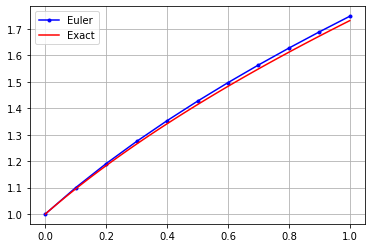

In [4]:
f = lambda t,y: 1/y
t0 = 0; tf = 1; t = np.linspace(t0,tf,11);
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,'b.-')
t_exact = np.linspace(t0,tf,100)
y_exact = np.sqrt(2*t_exact + 1)
plt.plot(t_exact,y_exact,'r'), plt.grid(True),plt.legend(['Euler','Exact'])
plt.show()

Try another example. The solution of $y'=y^2$,$y(0)=1$ is

$$
y(t) = \frac{1}{1 - t}
$$

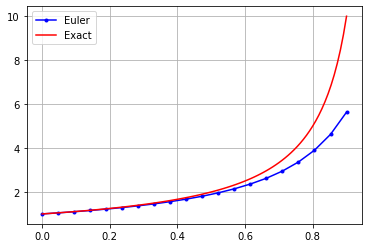

In [5]:
f = lambda t,y: y**2
t0 = 0; tf = 0.9; t = np.linspace(t0,tf,20);
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,'b.-')
t_exact = np.linspace(t0,tf,100)
y_exact = 1/(1 - t_exact)
plt.plot(t_exact,y_exact,'r')
plt.grid(True), plt.legend(['Euler','Exact'])
plt.show()

## Order of error

Let $y' = f(t,y)$, $y(t_0)=y_0$. Let $y_1$ be an approximation of $y(t_1)$ by one step of some numerical method (such as Euler's method).

The **local truncation error** is

$$
E_{\mathrm{local}}(h) = | y(t_1) - y_1 |
$$

where $h = t_1 - t_0$ is the step size. The word local means we are looking at just one step of the method.

The global truncation error is the accumulation of local errors. Choose an interval $[t_0,t_f]$ over which to approximate. Fix an integer $N$ which is the number of steps from $t_0$ to $t_f$ and let

$$
h = \frac{t_f - t_0}{N}
$$

be the step size. Let $t_n = t_0 + nh$. The **global truncation error** is the error after $N$ steps of the method

$$
E_{\mathrm{global}}(h) = | y(t_N) - y_N |
$$

The word global means we are looking at the error over $N$ steps from $t_0$ to $t_N$.

The word truncation has to do with truncating the Taylor series. For example, Euler's method uses degree 1 Taylor approximation. Talyor's theorem says

$$
y(t_1) = y(t_0) + y'(t_0)(t_1 - t_0) + \frac{y''(c)}{2}(t_1 - t_0)^2
$$

for some $c \in [t_0,t_1]$. Therefore, if $|y''(t)|\leq K_2$ for all $t \in [t_0,t_1]$, then

$$
E_{\mathrm{local}}(h) = \left| \frac{y''(c)}{2}(t_1 - t_0)^2 \right| \leq \frac{K_2 h^2}{2}
$$

Let's plot local truncation error for Euler's method applied to $y'=y$, $y(0)=1$.

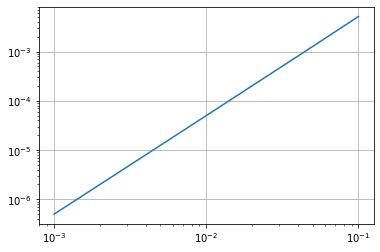

In [6]:
y0 = 1;
hs = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(hs))
for n in range(0,len(hs)):
    h = hs[n]
    y1 = y0 + y0*h;
    y1_exact = np.exp(h)
    E[n] = np.abs(y1_exact - y1)
plt.loglog(hs,E), plt.grid(True)
plt.show()

The loglog plot has slope 2 as expected from the error formula.

Let's plot global truncation error for Euler's method applied to $y'=y$, $y(0)=1$.

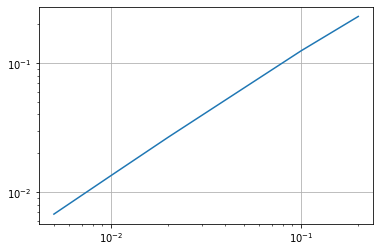

In [7]:
y0 = 1; t0 = 0; tf = 1;
f = lambda t,y: y
yN_exact = np.exp(tf)
Ns = np.array([5,10,50,100,200])
hs = (tf - t0)/Ns
E = np.zeros(len(hs))
for n in range(0,len(hs)):
    N = Ns[n]
    t = np.linspace(t0,tf,N+1)
    y = odeEuler(f,t,y0)
    E[n] = np.abs(yN_exact - y[-1])
plt.loglog(hs,E), plt.grid(True)
plt.show()

The loglog plot has slope 1.